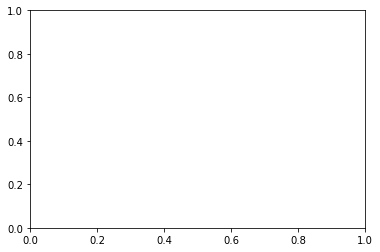

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import crystalball
import math
%matplotlib inline
fig, ax = plt.subplots(1, 1)

ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

Сгенерируйте примеры из распределения

In [165]:
beta=5
m=10
r = crystalball.rvs(beta, m, size=100)

In [166]:
r

array([-8.90585114e-01,  2.26228465e-02,  6.67697526e-01,  6.80915507e-01,
        1.14157030e-01,  5.58629822e-01, -1.26902669e+00, -9.63975153e-01,
       -8.27946768e-02,  6.85331369e-02,  6.42348881e-01,  1.30331435e+00,
       -1.78831523e+00, -7.62182627e-02, -1.47690269e+00,  8.32734041e-01,
       -1.01751399e+00, -5.73607945e-02,  1.13165915e-01, -8.00032325e-01,
        7.73721601e-01,  5.21968424e-01,  4.68861216e-01, -5.40157697e-01,
        9.54433958e-01,  1.43358075e-01,  1.81987673e-01,  3.34306054e-01,
       -5.04836666e-02, -5.22929605e-01, -3.53453098e-01, -1.34136774e-01,
        1.40041509e+00,  4.12800286e-01, -8.88552447e-01,  8.23839163e-02,
        6.37887488e-01, -4.21975772e-01,  2.16036791e-01,  2.21185612e-01,
        1.77012921e+00,  2.22237334e+00,  5.67757775e-01, -5.31602472e-02,
       -3.88091123e-01,  1.16797698e-01, -5.65999760e-01, -5.18876146e-01,
       -2.26280216e+00,  6.60781105e-01, -7.16470965e-01, -5.92338775e-01,
       -3.78140292e-01, -

In [5]:
r.dtype

dtype('float64')

In [168]:
r_mean = r.mean() # выборочное среднее
print(r_mean)
r_var = r.var() # выборочная дисперсия
print(r_var)

-0.06980588690422757
0.857021191941229


Постройте гистограмму выборки и теоретическую плотность распределения

In [171]:
import numpy as np
from scipy.stats import exponpow
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 1)

In [172]:
beta=5
m=10
r = crystalball.rvs(beta, m, size=1000)

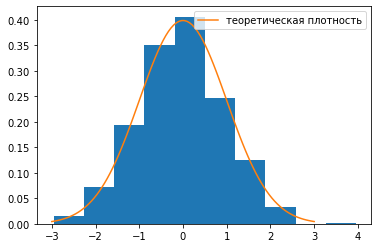

In [173]:
# ваш код тут
plt.hist(r, density=True)
x = np.linspace(-3,3,100)
# print(x)
pdf = crystalball.pdf(x,beta,m)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1)
plt.legend()

In [174]:
r_mean = r.mean() # выборочное среднее
print(r_mean)
r_var = r.var() # выборочная дисперсия
print(r_var)

-0.046073248865278686
0.9679576093580142


Оценим распределение выборочного среднего для разных объёмов выборок

Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

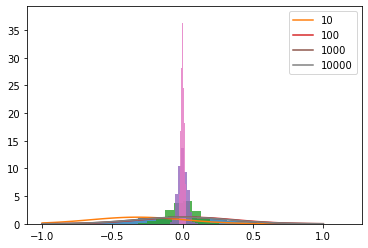

In [175]:
beta=3
m=7
for n in [10,100,1000,10000]:
    data= [crystalball.rvs(beta, m, size=n).mean() for i in range (1,500)]
    plt.hist(data, density=True,alpha=0.8)
    x = np.linspace(-1,1,100)
    norm_rv=sts.norm(loc=crystalball.rvs(beta, m, size=n).mean(),scale=crystalball.std(beta, m)/np.sqrt(N-1))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='теоретическая плотность', alpha=2)

plt.legend(['10','100','1000','10000'])
plt.show()    

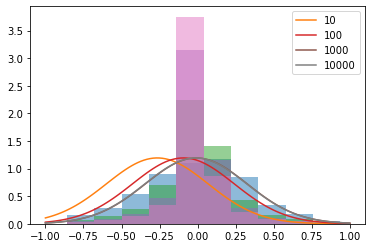

In [163]:
means=[]
for n in [10,100,1000,10000]:
    for i in range(500):
        means.append(np.mean(crystalball.rvs(beta, m, size=n)))
    plt.hist(means, density=True,alpha=0.5)
    x = np.linspace(-1,1,100)
    norm_rv=sts.norm(loc=crystalball.rvs(beta, m, size=n).mean(),scale=crystalball.std(beta, m)/np.sqrt(N-1))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='теоретическая плотность', alpha=4,mew=5)

plt.legend(['10','100','1000','10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? Ваш ответ:

Хорошо, т.к распределение получилось близко к нормальному, чем выше объем выборки

Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [176]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [235]:
from statsmodels.stats.weightstats import _zconfint_generic

In [246]:
data=df[['total day calls','churn']]

In [247]:
data.groupby(['churn']).mean()

,total day calls
churn,
False,100.283158
True,101.335404


In [248]:
N=len(data)
a=sts.norm.interval(alpha=0.95, loc=np.mean(data), scale=np.std(data,ddof=1)/np.sqrt(N-1))

In [249]:
a

(array([99.75421058,  0.13296027]), array([101.11707655,   0.15686872]))

In [232]:
data.groupby(['churn']).agg(lambda x: sts.norm.interval(alpha=0.95, loc=np.mean(x), scale=np.std(x,ddof=1)/np.sqrt(N-1)))
# data.groupby(['churn']).agg(lambda x: sts.norm.interval(alpha=0.95, loc=np.mean(data), scale=np.std(data,ddof=1)/np.sqrt(N-1)))

,total day calls
churn,
False,"(99.55606076109109, 101.0102550283826)"
True,"(99.40866670589261, 103.26214074752355)"


In [240]:
# _zconfint_generic(np.mean(data),std_mean=np.std(data,ddof=1)/np.sqrt(N-1), alpha=0.05,alternative='2s')
data.groupby(['churn']).agg(lambda x: _zconfint_generic(np.mean(x),std_mean=np.std(x,ddof=1)/np.sqrt(len(x)-1), alpha=0.05,alternative='2s'))

,total day calls
churn,
False,"(99.55606076109109, 101.0102550283826)"
True,"(99.40866670589261, 103.26214074752355)"


In [ ]:
Доверительный интервал шире у нелояльных клиентов, что говорит о 

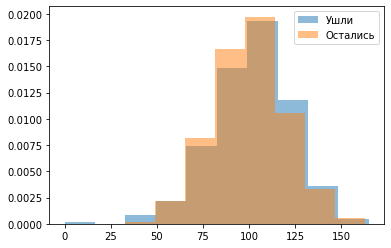

In [277]:
gone=list(data['total day calls'][data['churn']==True])
stay=list(data['total day calls'][data['churn']==False])# beta=3

plt.hist(gone, density=True,alpha=0.5)
plt.hist(stay,density=True,alpha=0.5)

plt.legend(['Ушли','Остались'])
plt.show()  